# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress

# Import API key
import api_keys
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print (citipy)

<module 'citipy.citipy' from 'C:\\Users\\arodr\\anaconda3\\lib\\site-packages\\citipy\\citipy.py'>


## Generate Cities List

In [2]:
#Print today's date
today = f"{datetime.datetime.now():%m/%d/%y}"
print (today)

05/29/21


In [3]:
# List for holding lat_Lngs and cities
lat_lngs = []
cities = []

# Creates a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat & lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # For each unique city name, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print city count to confirm sufficient count
len(cities)

578

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# create lists that hold reponse information
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [5]:
# Loop through the list of cities and execute a request for data on each city item

print('Beginning Data Retrieval')     
print('_________________________')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        print(f'City not found. Skipping...')
    
print(f'______________________________')
print(f'Data Retrieval Complete     ')
print(f'______________________________')

Beginning Data Retrieval
_________________________
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | shubarkuduk
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | urumqi
Processing Record 8 of Set 1 | barao de melgaco
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | naze
Processing Record 13 of Set 1 | pathein
Processing Record 14 of Set 1 | zigong
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | chimbote
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | busselton
City not found. Skipping...
Processing Record 20 of Set 1 | gondar
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | hobart
Proc

Processing Record 188 of Set 1 | whitianga
Processing Record 189 of Set 1 | port blair
Processing Record 190 of Set 1 | boa vista
Processing Record 191 of Set 1 | raudeberg
Processing Record 192 of Set 1 | rundu
Processing Record 193 of Set 1 | laramie
Processing Record 194 of Set 1 | gigmoto
Processing Record 195 of Set 1 | saint anthony
Processing Record 196 of Set 1 | huarmey
Processing Record 197 of Set 1 | torbay
Processing Record 198 of Set 1 | rocha
Processing Record 199 of Set 1 | ossora
City not found. Skipping...
Processing Record 200 of Set 1 | amberley
Processing Record 201 of Set 1 | never
Processing Record 202 of Set 1 | kodiak
Processing Record 203 of Set 1 | uray
Processing Record 204 of Set 1 | flin flon
Processing Record 205 of Set 1 | tete
Processing Record 206 of Set 1 | tabou
Processing Record 207 of Set 1 | monroe
Processing Record 208 of Set 1 | chongwe
Processing Record 209 of Set 1 | srivardhan
Processing Record 210 of Set 1 | sendai
Processing Record 211 of Se

Processing Record 375 of Set 1 | taoudenni
Processing Record 376 of Set 1 | caxito
City not found. Skipping...
City not found. Skipping...
Processing Record 377 of Set 1 | sibay
Processing Record 378 of Set 1 | bilibino
Processing Record 379 of Set 1 | nizhniy kuranakh
Processing Record 380 of Set 1 | high rock
Processing Record 381 of Set 1 | hambantota
Processing Record 382 of Set 1 | saldanha
Processing Record 383 of Set 1 | san juan ixcoy
Processing Record 384 of Set 1 | khorixas
Processing Record 385 of Set 1 | eydhafushi
Processing Record 386 of Set 1 | sovetskiy
Processing Record 387 of Set 1 | leshukonskoye
Processing Record 388 of Set 1 | galesong
City not found. Skipping...
Processing Record 389 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 390 of Set 1 | kologriv
Processing Record 391 of Set 1 | hamilton
Processing Record 392 of Set 1 | plettenberg bay
Processing Record 393 of Set 1 | sfantu gheorghe
Processing Record 394 of Set 1 | caucaia
City not found. Skipping.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = pd.DataFrame({
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed})

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherPy_data.csv')

# print the lengh of each list 
print(f'City          {len(City)}')
print(f'Cloudiness    {len(Cloudiness)}')
print(f'Country    {len(Country)}')
print(f'Date    {len(Date)}')
print(f'Humidity    {len(Humidity)}')
print(f'Lat    {len(Lat)}')
print(f'Lng    {len(Lng)}')
print(f'Max Temp    {len(Max_Temp)}')
print(f'Wind Speed    {len(Wind_Speed)}')

City          541
Cloudiness    541
Country    541
Date    541
Humidity    541
Lat    541
Lng    541
Max Temp    541
Wind Speed    541


In [7]:
weather_data.head()

NameError: name 'weather_data' is not defined

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

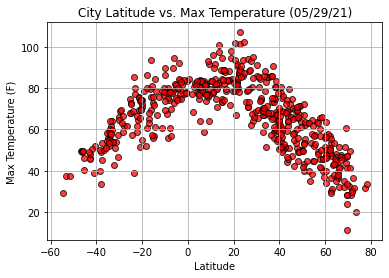

In [9]:
#plot Latitude vs Max_Temperature
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(Lat, Max_Temp, marker="o", alpha=.75, color = "red",edgecolor = "black")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

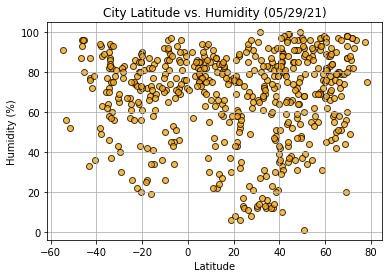

In [10]:
#plot Latitude vs Humidity
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.scatter(Lat, Humidity, marker="o", alpha=.75, color = "orange",edgecolor = "black")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

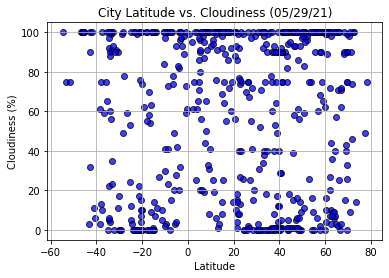

In [11]:
#plot Latitude vs Cloudiness
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.scatter(Lat, Cloudiness, marker="o", alpha=.75, color = "blue",edgecolor = "black")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

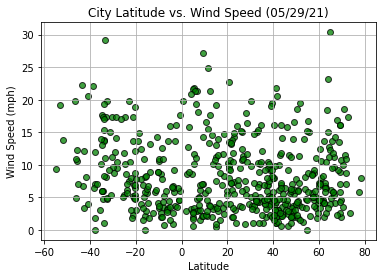

In [12]:
#plot Latitude vs Wind Speed
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.scatter(Lat, Wind_Speed, alpha=.75, color = "green",edgecolor = "black")
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
# Define the function that creates a linear Regression and Scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [14]:
# Create Northern and Southern Hemisphere Dataframes
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

The r-squared is : -0.82


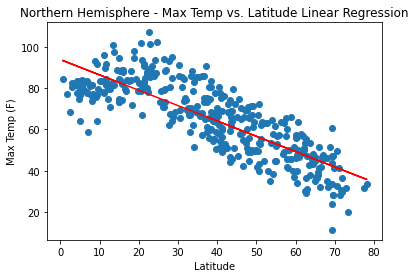

In [15]:
#Define linear regression equation
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Annotate equation
annotate(equation, 0, 0)

# Set plot title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set the x-label
plt.xlabel("Latitude")

# Set the y-label
plt.ylabel("Max Temp (F)")

#Save image of the figure into Images folder
plt.savefig("../Instructions/Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.81


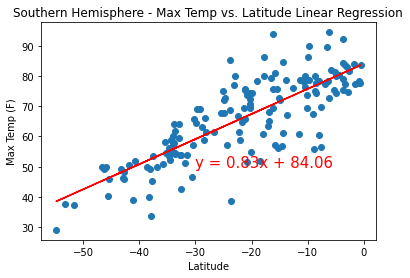

In [16]:
#Define linear regression equation
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Annotate equation
annotate(equation, -30, 50)

# Set plot title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set the x-label
plt.xlabel("Latitude")

# Set the y-label
plt.ylabel("Max Temp (F)")

#Save image of the figure into Images folder
plt.savefig("../Instructions/Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.12


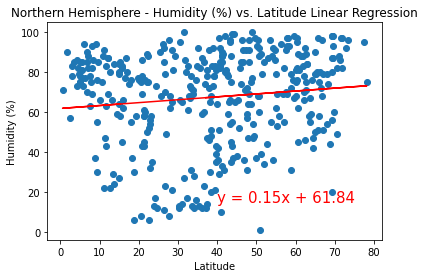

In [17]:
#Define linear regression equation
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Annotate equation
annotate(equation, 40, 15)

# Set plot title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set the x-label
plt.xlabel("Latitude")

# Set the y-label
plt.ylabel("Humidity (%)")

#Save image of the figure into Images folder
plt.savefig("../Instructions/Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.03


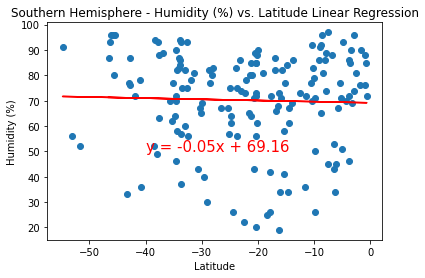

In [18]:
#Define linear regression equation
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Annotate equation
annotate(equation, -40, 50)

# Set plot title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set the x-label
plt.xlabel("Latitude")

# Set the y-label
plt.ylabel("Humidity (%)")

#Save image of the figure into Images folder
plt.savefig("../Instructions/Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.07


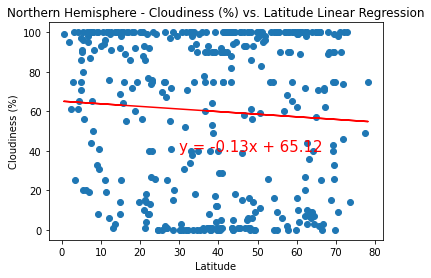

In [19]:
#Define linear regression equation
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Annotate equation
annotate(equation, 30, 40)

# Set plot title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

#Save image of the figure into Images folder
plt.savefig("../Instructions/Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.03


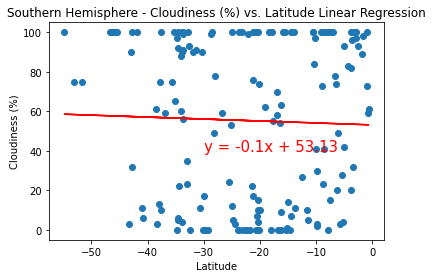

In [20]:
#Define linear regression equation
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Annotate equation
annotate(equation, -30, 40)

# Set plot title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set the x-label
plt.xlabel("Latitude")

# Set the y-label
plt.ylabel("Cloudiness (%)")

#Save image of the figure into Images folder
plt.savefig("../Instructions/Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.08


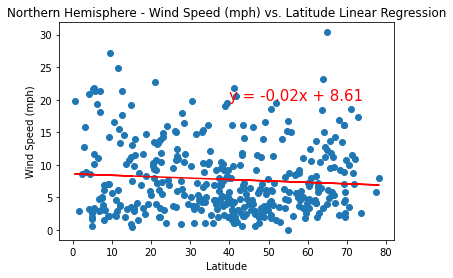

In [21]:
#Define linear regression equation
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Annotate equation
annotate(equation, 40, 20)

# Set plot title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set the x-label
plt.xlabel("Latitude")

# Set the y-label
plt.ylabel("Wind Speed (mph)")

#Save image of the figure into Images folder
plt.savefig("../Instructions/Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.36


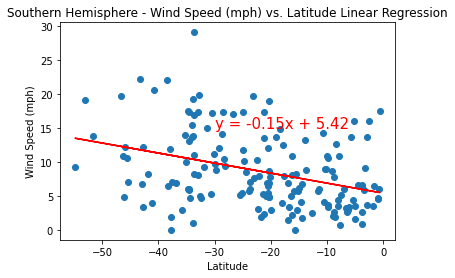

In [22]:
#Define linear regression equation
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Annotate equation
annotate(equation, -30, 15)

# Set plot title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set the x-label
plt.xlabel("Latitude")

# Set the y-label
plt.ylabel("Wind Speed (mph)")

#Save image of the figure into Images folder
plt.savefig("../Instructions/Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")